In [1]:
import pandas as pd
df = pd.read_json("250k.docs.jsonl", lines=True)

In [2]:
df.columns

Index(['PaperId', 'Title', 'Rank', 'CitationCount', 'Doi', 'DocType',
       'BookTitle', 'Volume', 'Issue', 'FirstPage', 'LastPage',
       'PublishedDate', 'Publisher', 'Journal', 'Authors', 'FieldsOfStudy',
       'Urls', 'PdfUrl', 'Abstract'],
      dtype='object')

In [3]:
df.DocType.unique()

array(['Journal', 'Book', 'Patent', 'Conference', None], dtype=object)

In [18]:
papers = df[(df.DocType == "Journal") | (df.DocType == "Conference")]

In [19]:
papers.columns

Index(['PaperId', 'Title', 'Rank', 'CitationCount', 'Doi', 'DocType',
       'BookTitle', 'Volume', 'Issue', 'FirstPage', 'LastPage',
       'PublishedDate', 'Publisher', 'Journal', 'Authors', 'FieldsOfStudy',
       'Urls', 'PdfUrl', 'Abstract'],
      dtype='object')

In [20]:
papers = papers.drop(columns=["Urls", "PdfUrl", "Doi", "Volume", "Issue", "FirstPage", "LastPage", "BookTitle"])

In [21]:
papers.iloc[0].Authors

[{'Name': 'F. Motoyoshi', 'AuthorId': '2632896860', 'SequenceNumber': 1},
 {'Name': 'N. Oshima', 'AuthorId': '2708987407', 'SequenceNumber': 2}]

In [22]:
papers.iloc[0].FieldsOfStudy

[{'Name': 'tobacco mosaic virus', 'Level': 3},
 {'Name': 'virus', 'Level': 2},
 {'Name': 'protoplast', 'Level': 2},
 {'Name': 'virology', 'Level': 1},
 {'Name': 'botany', 'Level': 1},
 {'Name': 'biology', 'Level': 0}]

In [23]:
authors = set()
for i, row in papers.iterrows():
    for entry in row.Authors:
        authors.add(entry["AuthorId"])

In [24]:
len(authors)

533118

In [25]:
major_fields = set()
no_major_fields = set()
minor_fields = set()
topics = set()
problems = set()
for i, row in papers.iterrows():
    major_amount = 0
    for entry in row.FieldsOfStudy:
        if entry["Level"] == 0:
            major_fields.add(entry["Name"])
            major_amount += 1
        elif entry["Level"] == 1:
            minor_fields.add(entry["Name"])
        elif entry["Level"] == 2:
            topics.add(entry["Name"])
        else:
            problems.add(entry["Name"])
    no_major_fields.add(major_amount)

In [26]:
print(f"Major Fields: {len(major_fields)}, Amounts: {no_major_fields}")
print(f"Minor Fields: {len(minor_fields)}")
print(f"Topics: {len(topics)}")
print(f"Problems: {len(problems)}")

Major Fields: 19, Amounts: {0, 1, 2, 3}
Minor Fields: 294
Topics: 28274
Problems: 49262


In [27]:
import numpy as np
majors = []
minors = []
journals = []
for i, row in papers.iterrows():
    major_fields = []
    minor_fields = []
    journal_entry = row.Journal
    for entry in row.FieldsOfStudy:
        level = entry["Level"]
        name = entry["Name"]
        if level == 0:
            major_fields.append(name)
        elif level == 1:
            minor_fields.append(name)
    majors.append(major_fields)
    minors.append(minor_fields)
    journals.append(journal_entry["JournalName"] if journal_entry else np.nan)
    
papers["MajorFields"] = majors
papers["MinorFields"] = minors
papers["Journal"] = journals

In [51]:
papers = papers.drop(columns=["Authors", "FieldsOfStudy"])[papers.MajorFields.apply(lambda x: len(x)) == 1]

In [54]:
papers["MajorFields"] = papers.MajorFields.apply(lambda x: x[0])

<AxesSubplot:xlabel='% Total', ylabel='MajorFields'>

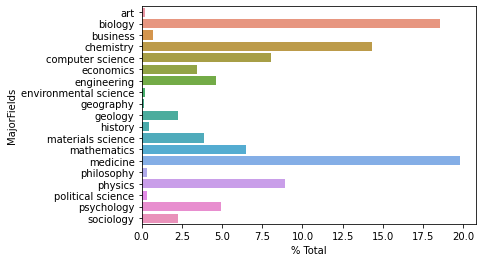

In [71]:
import seaborn as sns
sns.barplot(x=papers.groupby("MajorFields").count()["Title"].rename("% Total") /  papers.shape[0] * 100, y=papers.groupby("MajorFields").count().index)

<AxesSubplot:xlabel='Total', ylabel='MajorFields'>

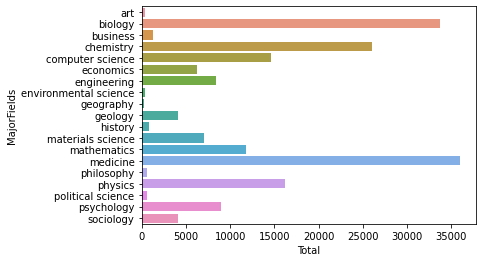

In [72]:
sns.barplot(x=papers.groupby("MajorFields").count()["Title"].rename("Total"), y=papers.groupby("MajorFields").count().index)

In [73]:
papers.head(4)

,PaperId,Title,Rank,CitationCount,DocType,PublishedDate,Publisher,Journal,Abstract,MajorFields,MinorFields
0,2013265920,Infection with Tobacco Mosaic Virus of Leaf Me...,22568,101,Journal,1975-10-01,Microbiology Society,Journal of General Virology,Summary\nA procedure was developed to isolate ...,biology,"[virology, botany]"
2,2013266099,An indigenous cluster beam apparatus with a re...,21730,6,Journal,2000-04-01,Indian Academy of Sciences,Journal of Chemical Sciences,The design and fabrication of a Smalley-type c...,chemistry,"[analytical chemistry, nuclear magnetic resona..."
5,2013266397,Determination of Plasma Dexamethasone in the M...,22203,76,Journal,1983-01-01,The Endocrine Society,The Journal of Clinical Endocrinology and Meta...,A RIA method is described for the measurement ...,medicine,"[endocrinology, internal medicine]"
6,2013266476,Women and radio,22912,16,Journal,1980-01-01,Pergamon,Women's Studies International Quarterly,Synopsis The relationship between women and ...,sociology,[advertising]
